In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1

Let us first plot the sine function $f(x) = \sin x$ for $x\in[0,2\pi]$, using 60 points.

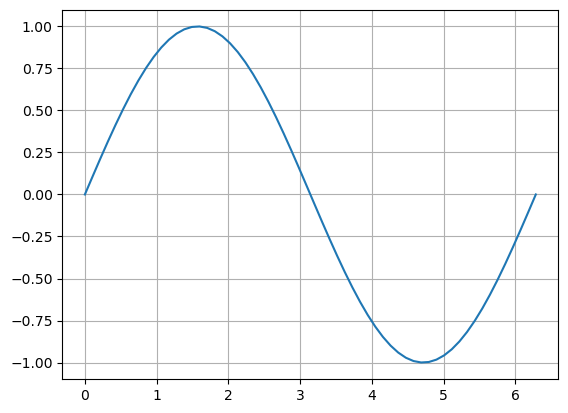

In [2]:
X = np.linspace(0,2*np.pi,60)
plt.plot(X,np.sin(X))
plt.grid()
plt.show()

## Example 2.
Let us consider an polynomial of arbitrary degree $n$ with coefficients $a_0,\ldots,a_n$, that is

$$
      P(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n
$$

There is a way to implement this computation that reduces rounding errors on the computer, it is called Horner's rule. If for instance $P(x)=a_0+a_1 x + a_2 x^2 + a_3 x^3$ one writes

$$
     P(x) = a_0 + x(a_1 + x(a_2 + a_3 x))
$$

This can be turned into a general algorithm.


We compute and plot such a polynomial for arbitrary coefficients, and we want it to work for several values of $x$ simultaneously.

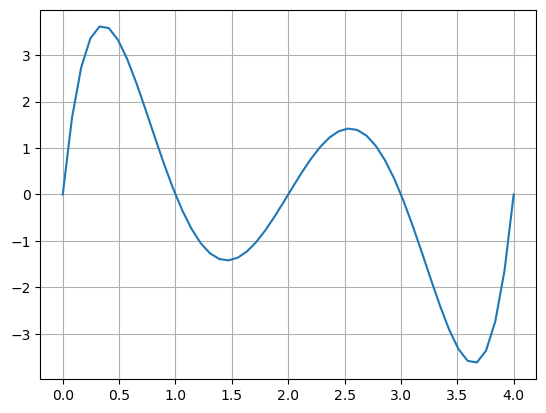

In [3]:
def horner(a,x):
    n = a.shape[0]-1
    P = a[n]
    for k in range(n,0,-1):
        P = P*x+a[k-1]
    return(P)

coeff=np.array([0,24,-50,35,-10,1])
X=np.linspace(0,4,50)
P=horner(coeff,X)

plt.plot(X,P)
plt.grid()
plt.show()

## Example 3.
Construct a $n\times n$-matrix with three constant diagonals. 

$$
    A = \left[ 
    \begin{array}{rrrrr}
     b & c  & 0 & \cdots & 0 \\
     a  & b & c & \cdots & 0 \\
    \vdots  & \ddots&\ddots & \ddots &    \\
        &        &       &    & c \\
      0  &  \cdots      &    0  &  a & b
    \end{array}
    \right] = \text{tridiag}(a,b,c)
$$

In [4]:
# We define a function for this purpose

def tridiag(a,b,c,n):

    '''
    a: subdiagonal element
    b: diagonal element
    c: superdiagonal element
    n: size of matrix
    '''
    ee = np.ones((n,)) # this is the vector of dim n with ones
    A = b*np.diag(ee)
    A += a*np.diag(ee[1:],-1)
    A += c*np.diag(ee[1:],1)
    return A
    
a, b, c = 1, -2, 1
n = 4
A = tridiag(a,b,c,n)
print(A)
    

[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]


## Example 4.
Approximation the solution to $y''(x) = f(x)$, $y(0)=0,\ y(1)=0$ by a finite difference method.
We try this out for $f(x)=\sin\pi x$, $f(x)=4x(1-x)$.


By "a finite difference method", we mean that we divide the interval $[0,1]$ into intervals of equal width, so we introduce

$$
  x_k = k h,\ k=0,\ldots,N,\quad\text{where}\ k=1/N,\ \text{and where}\ N\ \text{is a large integer}
$$

The we let $y_k\approx y(x_k)$ and approximate

$$
  y''(x_k) \approx \frac{y_{k+1}-2y_k+y_{k-1}}{h^2}
$$

We then find the equations

$$
     y_{k+1}-2y_k+y_{k-1} = h^2 f(x_k),\quad k=1,\ldots, N-1
$$

We can write this in matrix-vector form as

$$
   A\mathbf{y} = \mathbf{b},\quad A=\text{tridiag}(1,-2,1),\quad \mathbf{b}=h^2[f(x_1),\ldots,f(x_{n-1}]^T
$$

so we can use the function *tridiag* from the previous example.




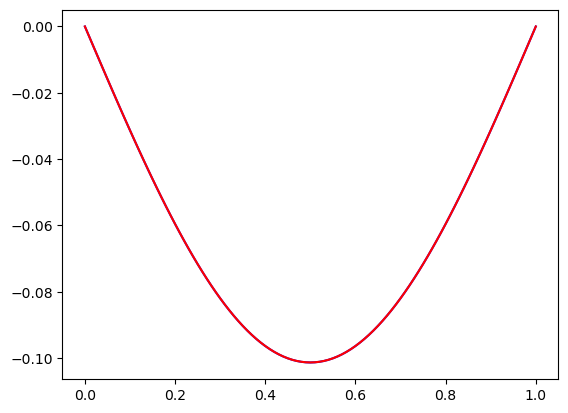

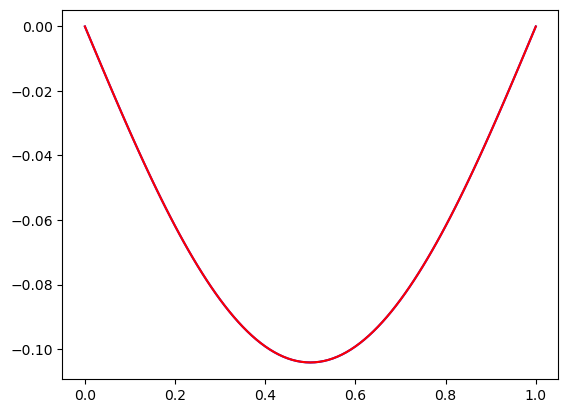

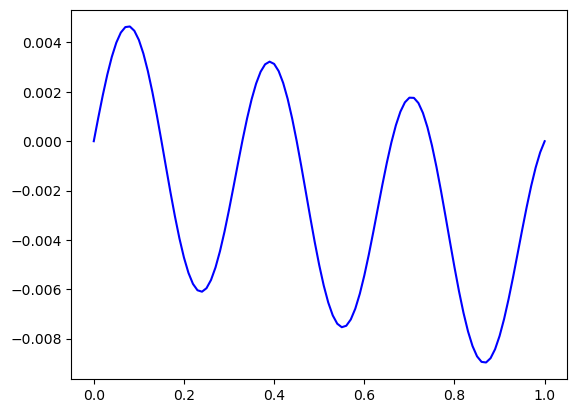

In [15]:
f1 = lambda x : np.sin(np.pi*x)
f2 = lambda x : 4*x*(1-x)
f3 = lambda x : -2*np.sin(20*X)
N=100
h=1/N
A=tridiag(1,-2,1,N-1)
X = np.linspace(h,1-h,N-1)
b1 = h**2 * f1(X)
b2 = h**2 * f2(X)
Y1 = np.linalg.solve(A,b1)
Y2 = np.linalg.solve(A,b2)
XX=np.linspace(0,1,N+1)
Exa_1 = -np.sin(np.pi*XX)/np.pi**2
Exa_2 = XX*(1-XX)*(XX**2-XX-1)/3

plt.plot(XX, np.pad(Y1,(1,1)), 'b',XX,Exa_1,'r')  # np.pad adds zeroes to each end of an array
plt.show()

plt.plot(XX,np.pad(Y2,(1,1)),'b',XX,Exa_2,'r')
plt.show()

b3 =  h**2 * f3(X)
Y3 = np.linalg.solve(A,b3)
plt.plot(XX,np.pad(Y3,(1,1)),'b')




## Example 5

A numerical method for computing integrals or for solving differential equations usually has a stepsize parameter, say $h$, such that when $h$ tends to zero, the approximation becomes more accurate, and the cost of the calculation increases. As an example, one could consider methods for approximating integrals

$$
    I = \int_0^1 f(x)\, dx
$$

We can use the trapezoidal rule here

$$
   T(h) = h\left(\frac12 f(0) + \sum_{k=1}^{N-1} f(kh) + \frac12 f(1)\right)
$$

Let us first implement this method and test it on the function 

$$
    f(x) = \frac{1}{x+1}\quad\Rightarrow\quad \int_0^1 f(x)\, dx = \ln 2
$$

In [17]:
def trapezoidal(f,N):
    h=1./N
    R = h * np.trapz(f(np.linspace(0,1,N+1))) 
    return(R)

f = lambda x : 1/(x+1)
N = 100        
print('Trapezoidal approximation:', trapezoidal(f,N))
print('Exact solution',np.log(2))

Trapezoidal approximation: 0.6931534304818243
Exact solution 0.6931471805599453


Such numerical methods can often be proved to have a certain order of convergence, this is an integer $p$ such that

$$
      \left|\text{Exact Integral} - \text{Numerical approximation}\right| \approx C\, h^p 
$$

for some constant $C$. In our case above, with the Trapezoidal rule, we know that $p=2$. We could set up a numerical experiment to see if this looks right, that is, if it holds that

$$
  E(h) =  \left|\int_0^1 f(x)\, dx - T(h)\right| \approx C\cdot h^2
$$

Suppose that we are in a situation where we know the exact value of the integral, that can be achieved by choosing $f(x)$ to be some function we can compute the integral of, say $f(x) = \frac{1}{1+x}$ whose integral between 0 and 1 is easily seen to be $\ln 2$. If we calculate the trapezoidal rule for two stepsizes, 
$h$ and $h/2$ we find that

$$
E(h) = \left|\ln 2 - T(h)\right| \approx C\cdot h^p\quad\text{and}\quad E(h/2) = \left|\ln 2 -T(h/2)\right| \approx C\cdot \left(\frac{h}{2}\right)^p
$$

Therefore 

$$
   E(h)/E(h/2) \approx 2^p\quad\text{so}\quad p\approx \frac{ \ln\left(\frac{E(h)}{E(h/2)}\right)}{\ln 2}
$$

In [20]:
N=2
h=1/N
h2=h/2
N2=2*N

def orderest(f,N):
    E = np.abs(np.log(2)-trapezoidal(f,N))
    E2 = np.abs(np.log(2)-trapezoidal(f,2*N))
    p = np.log(E/E2)/np.log(2)
    return(p)

print(orderest(f,N))


1.969881861946532
